For this week’s assignment we're going to use Dodgers Major League Baseball data from 2012. The data file you will be using is contained in the dodgers.csv file. I would like you to determine what night would be the best to run a marketing promotion to increase attendance. It is up to you if you decide to recommend a specific date or if you  recommend a day of the week (e.g., Tuesdays) or month and day of the week (e.g., July Tuesdays). Use R and/or Python to accomplish this assignment. It is important to remember, there will be lots of ways to solve this problem. Explain your thought process and how you used various techniques to come up with your recommendation. From this data, at a minimum, you should be able to demonstrate the following:

Box plots

Scatter plots

Regression Model

In [15]:
import pandas as pd
import numpy as np  # arrays and math functions
from scipy.stats import uniform  # for training-and-test split
import statsmodels.api as sm  # statistical models (including regression)
import statsmodels.formula.api as smf  # R-like model specification
import matplotlib.pyplot as plt  # 2D plotting
%matplotlib inline

In [3]:
df = pd.read_csv('dodgers.csv')
df

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...,...
76,SEP,29,40724,Saturday,Rockies,84,Cloudy,Night,NO,NO,NO,NO
77,SEP,30,35607,Sunday,Rockies,95,Clear,Day,NO,NO,NO,NO
78,OCT,1,33624,Monday,Giants,86,Clear,Night,NO,NO,NO,NO
79,OCT,2,42473,Tuesday,Giants,83,Clear,Night,NO,NO,NO,NO


## EDA

Text(0.5, 1.0, 'Attendance by Day of Week')

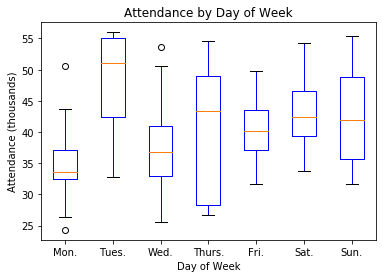

In [17]:
# convert attendance in thousands for plotting
df['attend_000'] = df['attend']/1000
# retrieve data for day of week
mondays = df[df['day_of_week'] == 'Monday']
tuesdays = df[df['day_of_week'] == 'Tuesday']
wednesdays = df[df['day_of_week'] == 'Wednesday']
thursdays = df[df['day_of_week'] == 'Thursday']
fridays = df[df['day_of_week'] == 'Friday']
saturdays = df[df['day_of_week'] == 'Saturday']
sundays = df[df['day_of_week'] == 'Sunday']

# convert days' attendance into list of vectors for box plot
data = [mondays['attend_000'], tuesdays['attend_000'],
    wednesdays['attend_000'], thursdays['attend_000'],
    fridays['attend_000'], saturdays['attend_000'],
    sundays['attend_000']]
day_names = ['Mon.', 'Tues.', 'Wed.', 'Thurs.', 'Fri.', 'Sat.', 'Sun.']

# box plot by day of the week
fig, axis = plt.subplots()
axis.set_xlabel('Day of Week')
axis.set_ylabel('Attendance (thousands)')
day_plot = plt.boxplot(data, sym='o', vert=1, whis=1.5)
plt.setp(day_plot['boxes'], color = 'blue')
plt.setp(day_plot['whiskers'], color = 'blue')
plt.setp(day_plot['fliers'], color = 'blue', marker = 'o')
axis.set_xticklabels(day_names)
plt.title('Attendance by Day of Week')

Text(0.5, 1.0, 'Attendence by Month')

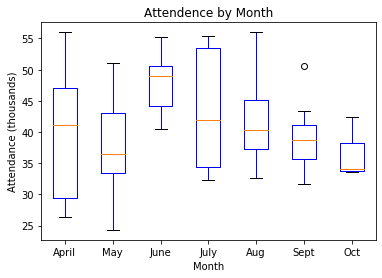

In [19]:
# Retrieve data by month
april = df[df['month'] == 'APR']
may = df[df['month'] == 'MAY']
june = df[df['month'] == 'JUN']
july = df[df['month'] == 'JUL']
august = df[df['month'] == 'AUG']
september = df[df['month'] == 'SEP']
october = df[df['month'] == 'OCT']
data = [april['attend_000'], may['attend_000'],
    june['attend_000'], july['attend_000'],
    august['attend_000'], september['attend_000'],
    october['attend_000']]
ordered_month_names = ['April', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct']
# box plot for by month
fig, axis = plt.subplots()
axis.set_xlabel('Month')
axis.set_ylabel('Attendance (thousands)')
day_plot = plt.boxplot(data, sym='o', vert=1, whis=1.5)
plt.setp(day_plot['boxes'], color = 'blue')
plt.setp(day_plot['whiskers'], color = 'blue')
plt.setp(day_plot['fliers'], color = 'blue', marker = 'o')
axis.set_xticklabels(ordered_month_names)
plt.title('Attendence by Month')

In [25]:
from pandas.plotting import scatter_matrix

In [ ]:

# trellis/lattice plot attendance by temp, conditioning on skies
# and day_night with bobblehead NO/YES shown in distinct colors
plt.figure()
plot = scatter_matrix(df,  x = 'temp', y = 'attend_000')
plot.add(scatter_matrix(['day_night', 'skies']))
plot.render(plt.gcf())
plt.show()
plt.savefig('fig_advert_promo_dodgers_eda_many.pdf',
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b',
    orientation='portrait', papertype=None, format=None,
    transparent=True, pad_inches=0.25, frameon=None)

# map day_of_week to ordered_day_of_week
day_to_ordered_day = {'Monday' : '1Monday',
     'Tuesday' : '2Tuesday',
     'Wednesday' : '3Wednesday',
     'Thursday' : '4Thursday',
     'Friday' : '5Friday',
     'Saturday' : '6Saturday',
     'Sunday' : '7Sunday'}
df['day_of_week'] = df['day_of_week'].map(day_to_ordered_day)

# map month to ordered_month
month_to_ordered_month = {'APR' : '1April',
     'MAY' : '2May',
     'JUN' : '3June',
     'JUL' : '4July',
     'AUG' : '5Aug',
     'SEP' : '6Sept',
     'OCT' : '7Oct'}
df['ordered_month'] = df['month'].map(month_to_ordered_month)